<a href="https://colab.research.google.com/github/lblogan14/PyTorch_tutorial_colab/blob/main/1_Introduction_to_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch Tensors

In [1]:
import torch

To create tensors,

In [2]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


Above, we created a 5x3 matrix filled with zeros and queried its datatype to find out that the zeros are 32-bit floating point numbers, which is the default PyTorch.

To create integers,

In [3]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


It is common to intialize learning weights randomly, often with a specific seed for the pseudorandom number generator (PRNG) for reproducibility of results:

In [4]:
torch.manual_seed(1)

r1 = torch.rand(2,2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2,2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1)
r3 = torch.rand(2,2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.7576, 0.2793],
        [0.4031, 0.7347]])

A different random tensor:
tensor([[0.0293, 0.7999],
        [0.3971, 0.7544]])

Should match r1:
tensor([[0.7576, 0.2793],
        [0.4031, 0.7347]])


PyTorch tensors perform arithmetic operations intuitively.

In [5]:
ones = torch.ones(2,3)
print(ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [6]:
twos = torch.ones(2,3) * 2 # every element is multiplied by 2
print(twos)

tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [7]:
threes = ones + twos # addition allowed because shapes are similar
print(threes) # tensors are added element-wise
print(threes.shape) # this has the same dimensions as input tensors

tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


In [8]:
r1 = torch.rand(2,3)
r2 = torch.rand(3,2)
r3 = r1 + r2 # shapes are different

RuntimeError: ignored

Samples of the mathematical operations available:

In [9]:
r = torch.rand(2,2) - 0.5 * 2
print('A random matrix, r:')
print(r)

A random matrix, r:
tensor([[-0.4275, -0.5020],
        [-0.0629, -0.3444]])


In [10]:
print('Absolute value of r:')
print(torch.abs(r))

Absolute value of r:
tensor([[0.4275, 0.5020],
        [0.0629, 0.3444]])


In [11]:
print('Inverse sine of r:')
print(torch.asin(r))

Inverse sine of r:
tensor([[-0.4418, -0.5259],
        [-0.0630, -0.3516]])


In [12]:
print('Determinant of r:')
print(torch.det(r))
print('\nSingluar value decomposition of r:')
print(torch.svd(r))

Determinant of r:
tensor(0.1157)

Singluar value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8988, -0.4384],
        [-0.4384,  0.8988]]),
S=tensor([0.7295, 0.1585]),
V=tensor([[ 0.5645,  0.8254],
        [ 0.8254, -0.5645]]))


In [13]:
print('Standard deviation(1st) and average(2nd) of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

Standard deviation(1st) and average(2nd) of r:
(tensor(0.1920), tensor(-0.3342))

Maximum value of r:
tensor(-0.0629)


In [14]:
print('Size of r:')
print(r.size())
print('\nSize of r.view(-1):')
print(r.view(-1).size())

Size of r:
torch.Size([2, 2])

Size of r.view(-1):
torch.Size([4])


#PyTorch Models

In [15]:
import torch                        # for all things PyTorch
import torch.nn as nn              # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F     # for the activation function

Express the LeNet-5 model in code:

In [16]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 3x3 square convolution kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6*6, 120) # 6*6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2,2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2,2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

This demonstrates the structure of a typical PyTorch model:
* It inherits from `torch.nn.Module` - modules may be nested - in fact, even the `Conv2d` and `Linear` layer classes inherit from `torch.nn.Module`.
* A model will have an `__init__()` function, where it instantiates its layers, and loads any data artifacts it may need.
* A model will have a `forward()` function. This is where the actual computation happens.
* We can build out our model class like any other Python class.

Instantiate this object and run a sample input through it:

In [17]:
net = LeNet()
print(net) # what does the object tell us about itself?

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [18]:
input = torch.rand(1, 1, 32, 32) # stand-in for a 32x32 black&white image
print('Image batch shape:')
print(input.shape)

Image batch shape:
torch.Size([1, 1, 32, 32])


In [19]:
output = net(input) # we don not call forward() directly
print('Raw output:')
print(output)
print(output.shape)

Raw output:
tensor([[ 0.0360, -0.1022, -0.0592, -0.0816, -0.1060, -0.1382, -0.0069, -0.1089,
         -0.1050, -0.0421]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


PyTorch models assume they are working on *batches* of data - for example, a batch of 16 of our image tiles would have the shape `(16, 1, 32, 32)`.

We ask the model for an inference by calling it like a function: `net(input)`. The output of this call represents the model's confidence that the input represents a particular digit. The shape of the output also has a batch dimension.

#Datasets and Dataloaders

In [20]:
import torch
import torchvision
import torchvision.transforms as transforms

The first thing we need to do is transform our incoming images into a PyTorch tensor.

In [21]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

'''
For transofrms.Normalize, the arguments passed need to be 
calculated for mean and std in each channel. Then we can
use those values as arguments in Normalize to make sure that
the values after this transformation have mean of zero and std of 0.5
'''

'\nFor transofrms.Normalize, the arguments passed need to be \ncalculated for mean and std in each channel. Then we can\nuse those values as arguments in Normalize to make sure that\nthe values after this transformation have mean of zero and std of 0.5\n'

There are two specified transofrmations for our input:
* `transforms.ToTensor()` converts images loaded by Pillow into  PyTorch tensors.
* `transforms.Normalize()` adjusts the values of the tensor so that their average is zero and their standard deviation is 0.5.

Next, we will create an instance of the CIFAR10 dataset. This is a set of 32x32 color image tiles representing 10 classes of objects:

In [22]:
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Once dataset is ready, we can give it to the `DataLoader`:

In [23]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

The `DataLoader` knows nothing about the data, but organizes the input tensors served by the `Dataset` into batches with the paraemeter we specify.

To visualize the batches our `DataLoader` serves:

In [24]:
import matplotlib.pyplot as plt
import numpy as np

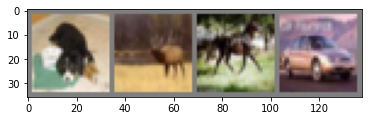

  dog  deer horse   car


In [25]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [26]:
torch.std_mean(images)
# check if the Normalize transform does work

(tensor(0.4921), tensor(-0.0482))

#Training PyTorch Model

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

First, need training and test datasets.

In [28]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Run and check the output from `DataLoader`:

  car  deer plane  ship


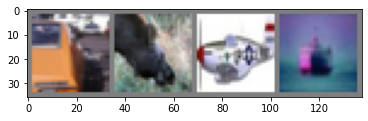

In [29]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Next, build the model:

In [30]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

The last ingredients are a loss function and an optimizer:

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Cross-entropy loss is a typical loss function for classification models.

Finally, all of this assembled into the training loop:

In [32]:
for epoch in range(2): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, start=0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: #print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch+1, i+1, running_loss/2000))
            running_loss = 0.
print('Finish Training')

[1,  2000] loss: 2.170
[1,  4000] loss: 1.841
[1,  6000] loss: 1.650
[1,  8000] loss: 1.562
[1, 10000] loss: 1.489
[1, 12000] loss: 1.446
[2,  2000] loss: 1.378
[2,  4000] loss: 1.358
[2,  6000] loss: 1.322
[2,  8000] loss: 1.283
[2, 10000] loss: 1.264
[2, 12000] loss: 1.259
Finish Training


Here, we did 2 training epochs (line 1). Each epoch has an inner loop that iterates over the training data (line 4), serving batches of transformed input images and their correct labels.

**Zeroing the gradient** (line 8) is important! Gradients are accumulated over a batch; if we do not reset them for every batch, they will keep accumulating, which will provide incorrect gradient values, making learning impossible.

We asked the model for its predictions on this batch in line 11, In line 12, we compute the loss - the difference between `outputs` and `labels`.

In line 13, we do the `backward` pass, and calculate the gradients that will direct the learning.

In line 14, the optimizer performs one learning step - it usees the gradients from the `backward()` call to nudge the learning weights in the direction it thinks will reduce the loss.

As a final step, we should check that the model is actually doing general learning, and not overfitting. This is why datasets are splitted into training and test subsets - to test the generality of the model, we ask it to make predictions on data it has not trained on:

In [33]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' %
      (100 * correct/total))

Accuracy of the network on the 10000 test images: 54 %
